In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def create_pseudo_sigmoid_curve(
    total_points=1000,
    plateau_size=150,
    infection_point=0.5,
    noise_level=0.02,
    steepness=10
):
    """
    Create a pseudo-sigmoidal curve between 0 and 1 with specified plateaus and noise.

    Parameters:
    - total_points (int): Total number of data points.
    - plateau_size (int): Number of points in the starting and ending plateaus.
    - infection_point (float): Inflection point of the sigmoid within the middle segment (0 to 1).
    - noise_level (float): Standard deviation of Gaussian noise to add.
    - steepness (float): Steepness parameter for the sigmoid function.

    Returns:
    - y_noisy (numpy.ndarray): Generated curve with noise.
    """
    # Validate parameters
    if plateau_size * 2 >= total_points:
        raise ValueError("Plateau size is too large for the total number of points.")
    if not (0 <= infection_point <= 1):
        raise ValueError("Infection point must be between 0 and 1.")

    # Number of points in the sigmoid segment
    sigmoid_size = total_points - 2 * plateau_size

    # Generate x values for the sigmoid
    x = np.linspace(0, 1, sigmoid_size)

    # Adjust x to place the inflection point at the desired infection_point
    x_shifted = x - infection_point

    # Compute the sigmoid
    sigmoid = 1 / (1 + np.exp(-steepness * x_shifted))

    # Initialize the full y array
    y = np.zeros(total_points)

    # Assign plateau at the beginning
    y[:plateau_size] = 0

    # Assign sigmoid in the middle
    y[plateau_size:total_points - plateau_size] = sigmoid

    # Assign plateau at the end
    y[total_points - plateau_size:] = 1

    # Add Gaussian noise
    noise = np.random.normal(0, noise_level, total_points)
    y_noisy = y + noise

    # Clip the values to stay within [0, 1]
    y_noisy = np.clip(y_noisy, 0, 1)

    return y_noisy

In [ ]:
def generate_batches(
    num_batches=10,
    total_points=1000,
    plateau_size=150,
    infection_point=0.5,
    noise_level=0.02,
    steepness=10,
    random_infection=False,
    random_noise=False,
    random_seed=None
):
    """
    Generate multiple batches of pseudo-sigmoidal curves and return as a long-format pandas DataFrame.

    Parameters:
    - num_batches (int): Number of batches to generate.
    - total_points (int): Total number of data points per batch.
    - plateau_size (int): Number of points in the starting and ending plateaus.
    - infection_point (float): Default inflection point (default 0.5).
    - noise_level (float): Default noise level (standard deviation) (default 0.02).
    - steepness (float): Steepness of the sigmoid (default 10).
    - random_infection (bool): If True, assign a random infection point to each batch.
    - random_noise (bool): If True, assign a random noise level to each batch.
    - random_seed (int or None): Seed for reproducibility.

    Returns:
    - df_long (pandas.DataFrame): Long-format DataFrame with columns ['batch', 'data_point', 'value'].
    - df_metadata (pandas.DataFrame): DataFrame containing metadata for each batch.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Initialize lists to store data
    data = []
    metadata = []

    for i in range(1, num_batches + 1):
        # Optionally randomize infection point and noise level
        current_infection_point = infection_point
        current_noise_level = noise_level
        if random_infection:
            current_infection_point = np.random.uniform(0.3, 0.7)  # Example range
        if random_noise:
            current_noise_level = np.random.uniform(0.01, 0.05)  # Example range

        # Generate the curve
        curve = create_pseudo_sigmoid_curve(
            total_points=total_points,
            plateau_size=plateau_size,
            infection_point=current_infection_point,
            noise_level=current_noise_level,
            steepness=steepness
        )

        # Create a DataFrame for the current batch
        df_batch = pd.DataFrame({
            'batch': f'Batch_{i}',
            'data_point': np.arange(total_points),
            'value': curve
        })

        # Append to the data list
        data.append(df_batch)

        # Store metadata
        metadata.append({
            'batch': f'Batch_{i}',
            'infection_point': current_infection_point,
            'noise_level': current_noise_level,
            'steepness': steepness,
            'plateau_size': plateau_size
        })

    # Concatenate all batches into a single DataFrame
    df_long = pd.concat(data, ignore_index=True)

    # Create a metadata DataFrame
    df_metadata = pd.DataFrame(metadata)

    return df_long, df_metadata

In [ ]:


def plot_batches_long(df_long, batches_to_plot=None, title='Pseudo Sigmoidal Batches', figsize=(12, 8)):
    """
    Plot multiple batches of pseudo-sigmoidal curves from a long-format DataFrame.

    Parameters:
    - df_long (pandas.DataFrame): Long-format DataFrame containing all batches to plot.
    - batches_to_plot (list or None): List of batch names to plot. If None, plots all batches.
    - title (str): Title of the plot.
    - figsize (tuple): Size of the figure.
    """
    plt.figure(figsize=figsize)

    if batches_to_plot is None:
        batches_to_plot = df_long['batch'].unique()

    for batch in batches_to_plot:
        batch_data = df_long[df_long['batch'] == batch]
        plt.plot(batch_data['data_point'], batch_data['value'], label=batch)

    plt.title(title)
    plt.xlabel('Data Point Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def save_batches_to_csv(df_long, df_metadata, data_filename='pseudo_sigmoid_batches_long.csv',
                        metadata_filename='pseudo_sigmoid_batches_metadata.csv'):
    """
    Save the long-format batches and metadata to CSV files.

    Parameters:
    - df_long (pandas.DataFrame): Long-format DataFrame containing all batches.
    - df_metadata (pandas.DataFrame): DataFrame containing metadata for each batch.
    - data_filename (str): Filename for the data CSV.
    - metadata_filename (str): Filename for the metadata CSV.
    """
    df_long.to_csv(data_filename, index=False)
    df_metadata.to_csv(metadata_filename, index=False)
    print(f"Data saved to '{data_filename}' and metadata saved to '{metadata_filename}'.")

First 5 rows of the generated long-format batches DataFrame:
     batch  data_point     value
0  Batch_1           0  0.031108
1  Batch_1           1  0.073149
2  Batch_1           2  0.000000
3  Batch_1           3  0.000000
4  Batch_1           4  0.075847

First 5 rows of the batches metadata DataFrame:
     batch  infection_point  noise_level  steepness  plateau_size
0  Batch_1         0.449816     0.048029         10           150
1  Batch_2         0.312634     0.047448         10           150
2  Batch_3         0.439528     0.014440         10           150
3  Batch_4         0.390609     0.034559         10           150
4  Batch_5         0.493399     0.027166         10           150


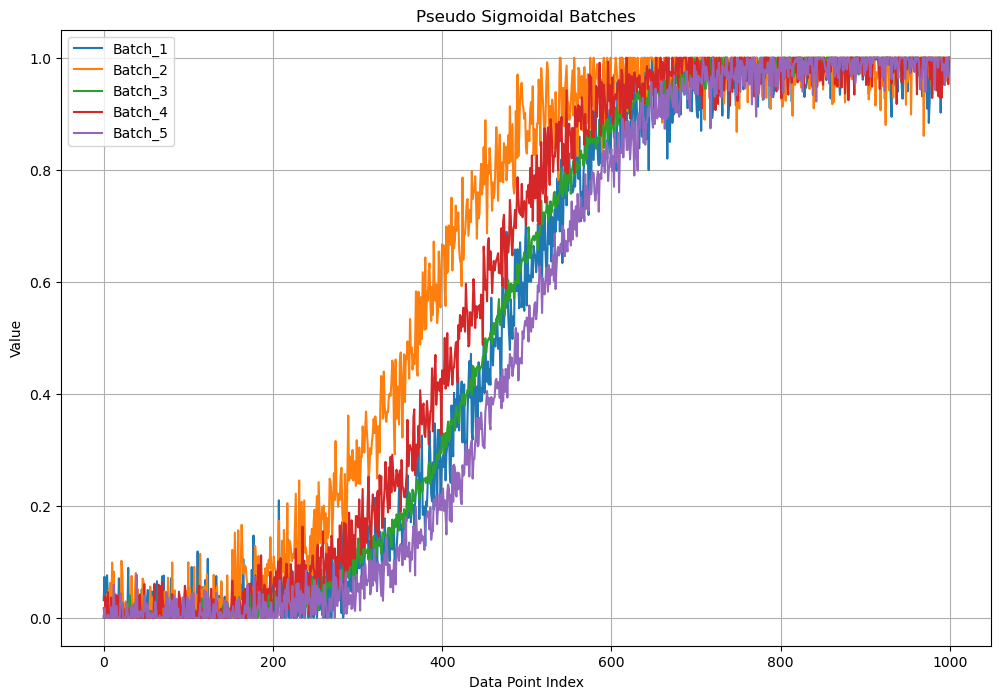


First 5 data points for Batch_1:
     batch  data_point     value
0  Batch_1           0  0.031108
1  Batch_1           1  0.073149
2  Batch_1           2  0.000000
3  Batch_1           3  0.000000
4  Batch_1           4  0.075847
Data saved to 'pseudo_sigmoid_batches_long.csv' and metadata saved to 'pseudo_sigmoid_batches_metadata.csv'.


In [6]:




# Example Usage
if __name__ == "__main__":
    # Configuration parameters
    num_batches = 20          # Number of batches to generate
    total_points = 1000       # Number of data points per batch
    plateau_size = 150        # Number of points in each plateau
    infection_point = 0.5     # Default inflection point
    noise_level = 0.02        # Default noise level
    steepness = 10            # Sigmoid steepness
    random_infection = True   # Enable randomizing infection points per batch
    random_noise = True       # Enable randomizing noise levels per batch
    random_seed = 42          # Seed for reproducibility (optional)

    # Generate the batches as a long-format DataFrame
    df_long, df_metadata = generate_batches(
        num_batches=num_batches,
        total_points=total_points,
        plateau_size=plateau_size,
        infection_point=infection_point,
        noise_level=noise_level,
        steepness=steepness,
        random_infection=random_infection,
        random_noise=random_noise,
        random_seed=random_seed
    )

    # Display the first few rows of the long-format DataFrame
    print("First 5 rows of the generated long-format batches DataFrame:")
    print(df_long.head())

    # Display the first few rows of the metadata DataFrame
    print("\nFirst 5 rows of the batches metadata DataFrame:")
    print(df_metadata.head())

    # Optional: Plot the first 5 batches
    batches_to_plot = [f'Batch_{i}' for i in range(1, 6)]
    plot_batches_long(df_long, batches_to_plot=batches_to_plot)

    # Example: Accessing a specific batch
    batch_number = 1
    specific_batch = df_long[df_long['batch'] == f'Batch_{batch_number}']
    print(f"\nFirst 5 data points for Batch_{batch_number}:")
    print(specific_batch.head())

    # Save the DataFrames to CSV files
    save_batches_to_csv(df_long, df_metadata)


In [7]:
df_batches

,Batch_1,Batch_2,Batch_3,Batch_4,Batch_5,Batch_6,Batch_7,Batch_8,Batch_9,Batch_10,Batch_11,Batch_12,Batch_13,Batch_14,Batch_15,Batch_16,Batch_17,Batch_18,Batch_19,Batch_20
0,0.031108,0.002829,0.000000,0.016797,0.000000,0.020656,0.005494,0.000000,0.000000,0.000000,0.000000,0.013327,0.009418,0.003962,0.000000,0.000950,0.067560,0.000000,0.022268,0.000000
1,0.073149,0.000000,0.003080,0.000000,0.017205,0.009480,0.030113,0.016629,0.000000,0.000000,0.030358,0.000000,0.019945,0.031446,0.000000,0.007465,0.059187,0.007694,0.000000,0.000000
2,0.000000,0.033130,0.000017,0.037417,0.000615,0.000114,0.013183,0.000000,0.056593,0.000000,0.026134,0.018337,0.016648,0.023848,0.019694,0.000000,0.025554,0.001333,0.025559,0.018317
3,0.000000,0.018670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026091,0.009290,0.010219,0.022166,0.008465,0.000000,0.039540,0.005557,0.000000,0.006444,0.000000,0.005729
4,0.075847,0.042476,0.009519,0.000000,0.000000,0.000990,0.059957,0.053009,0.000000,0.002632,0.023024,0.002989,0.000000,0.000000,0.029754,0.000000,0.000000,0.000000,0.025336,0.032637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.958156,0.997758,0.998922,0.991033,1.000000,1.000000,1.000000,0.965358,1.000000,0.986861,0.987475,1.000000,0.996052,1.000000,1.000000,1.000000,1.000000,1.000000,0.972519
996,0.972567,0.992263,0.972451,1.000000,1.000000,0.995850,1.000000,0.988167,0.932738,0.981644,1.000000,1.000000,0.994119,0.990551,1.000000,1.000000,0.979641,1.000000,1.000000,0.997452
997,1.000000,0.964655,0.987576,1.000000,0.965384,0.979508,1.000000,1.000000,1.000000,0.993500,1.000000,0.982520,0.995628,0.972911,0.969613,0.997545,1.000000,1.000000,1.000000,0.986163
998,1.000000,0.967964,0.994028,0.952763,1.000000,1.000000,1.000000,0.995335,0.994292,1.000000,0.997049,1.000000,0.997257,0.973702,1.000000,0.991775,0.989877,1.000000,1.000000,0.987074


In [9]:
df_long


,batch,data_point,value
0,Batch_1,0,0.031108
1,Batch_1,1,0.073149
2,Batch_1,2,0.000000
3,Batch_1,3,0.000000
4,Batch_1,4,0.075847
...,...,...,...
19995,Batch_20,995,0.972519
19996,Batch_20,996,0.997452
19997,Batch_20,997,0.986163
19998,Batch_20,998,0.987074


In [8]:
sns.lineplot(data=df, x='Volume', y='Signal', hue='Batch')


NameError: name 'df' is not defined